In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use only one styling approach (Seaborn recommended)
sns.set_theme(style='whitegrid', context='notebook')

# Optional: If you want bigger plots by default
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('data.csv',
                 encoding='latin1',
                 low_memory=False)

# Show initial dataset shape
print("Initial Dataset Shape:", df.shape)

# Basic overview
print("\nColumns:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)

# Look at the top rows
display(df.head())

# Optional: Look at random rows
display(df.sample(5))

# Optional: Look at bottom rows
display(df.tail())

Initial Dataset Shape: (435742, 13)

Columns: ['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type', 'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5', 'date']

Data Types:
stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
32760,566,24-02-10,Assam,Daranga,Assam State Pollution Control Board,"Residential, Rural and other Areas",4.0,12.0,159.0,NaN,"Daranga, Baska district, BATAD,Assam near Sand...",NaN,2010-02-24
124325,132,05-09-14,Himachal Pradesh,Parwanoo,Himachal Pradesh State Environment Proection &...,"Residential, Rural and other Areas",2.0,15.0,55.0,NaN,"Regional Office, Sector- 4, Parwanoo",NaN,2014-09-05
224136,648,19-05-10,Maharashtra,Ulhasnagar,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",34.0,106.0,137.0,194.0,"Octroi Naka, Pawai-Chowk, Vithalwadi, Ulhasnagar",NaN,2010-05-19
292177,784,16-07-15,Puducherry,Karaikal,Puducherry Pollution Conrol Committee,"Residential, Rural and other Areas",14.0,8.0,47.0,NaN,"B.Ed College (PKCE), Nehru Nagar, Karaikal",NaN,2015-07-16
252430,349,03-04-15,Maharashtra,Mumbai,National Environmental Engineering Research In...,"Residential, Rural and other Areas",6.0,13.0,43.0,NaN,"Worli, Mumbai",NaN,2015-04-03


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", df.shape)

# Check missing values count and percentage
missing_counts = df.isnull().sum()
missing_percentage = (missing_counts / len(df)) * 100
print("\nMissing Values (Count):")
print(missing_counts)
print("\nMissing Values (Percentage):")
print(missing_percentage)

# If 'pm2_5' is mostly missing, drop it
if 'pm2_5' in df.columns:
    df.drop('pm2_5', axis=1, inplace=True)

# Convert 'stn_code' to string (it likely has mixed types)
if 'stn_code' in df.columns:
    df['stn_code'] = df['stn_code'].astype(str)

# Rename columns if needed
# 'rspm' → 'PM10' is common practice
if 'rspm' in df.columns:
    df.rename(columns={'rspm': 'PM10'}, inplace=True)

# If you want to rename 'spm' to 'SPM', uncomment:
# if 'spm' in df.columns:
#     df.rename(columns={'spm': 'SPM'}, inplace=True)

Shape after dropping duplicates: (435061, 14)

Missing Values (Count):
stn_code                            0
sampling_date                       0
state                               0
location                            0
agency                         149463
type                             5354
so2                                 0
no2                                 0
PM10                                0
spm                                 0
location_monitoring_station     27300
date                                0
Year                                0
Month                               0
dtype: int64

Missing Values (Percentage):
stn_code                        0.000000
sampling_date                   0.000000
state                           0.000000
location                        0.000000
agency                         34.354493
type                            1.230632
so2                             0.000000
no2                             0.000000
PM10                      

In [4]:
# Convert 'date' column to datetime
# (If your dataset has a different date column, adjust accordingly)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    # Drop rows where date couldn't be parsed
    df.dropna(subset=['date'], inplace=True)
else:
    print("No 'date' column found; please adjust the code to your date column.")

# Create 'Year' and 'Month' columns for analysis
if 'date' in df.columns:
    df['Year'] = df['date'].dt.year
    df['Month'] = df['date'].dt.month

print("\nData types after date parsing:")
print(df.dtypes)

# Show a few rows to confirm date parsing
display(df.head())


Data types after date parsing:
stn_code                               object
sampling_date                          object
state                                  object
location                               object
agency                                 object
type                                   object
so2                                   float64
no2                                   float64
PM10                                  float64
spm                                   float64
location_monitoring_station            object
date                           datetime64[ns]
Year                                    int32
Month                                   int32
dtype: object


,stn_code,sampling_date,state,location,agency,type,so2,no2,PM10,spm,location_monitoring_station,date,Year,Month
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01,1990,2
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990,2
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01,1990,2
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01,1990,3
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990,3


In [5]:
# Define your pollutant columns (adjust as needed)
pollutant_cols = ['so2', 'no2', 'PM10', 'spm']

# Convert each pollutant column to numeric (coerce errors to NaN)
for col in pollutant_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing pollutant values with the median (simple approach)
for col in pollutant_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Final check of missing after fill
print("\nMissing Values after filling with median:")
print(df[pollutant_cols].isnull().sum())


Missing Values after filling with median:
so2     0
no2     0
PM10    0
spm     0
dtype: int64


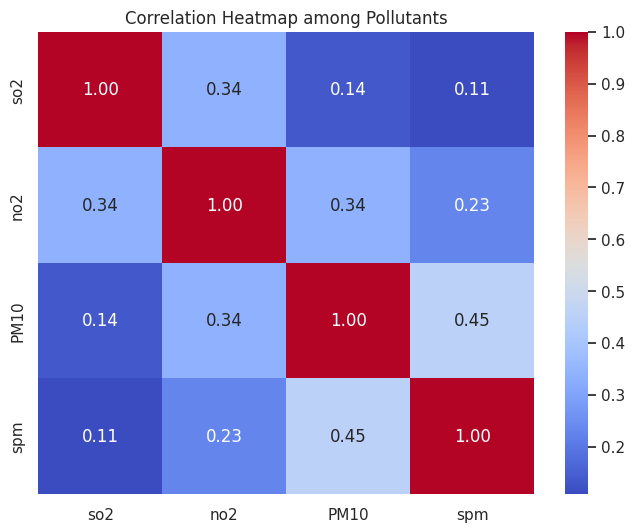

In [6]:
# Filter for existing pollutant columns in the DataFrame
available_pollutants = [col for col in pollutant_cols if col in df.columns]

# Create correlation heatmap
if len(available_pollutants) > 1:
    plt.figure(figsize=(8,6))
    corr = df[available_pollutants].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap among Pollutants')
    plt.show()
else:
    print("Not enough pollutant columns for correlation heatmap.")

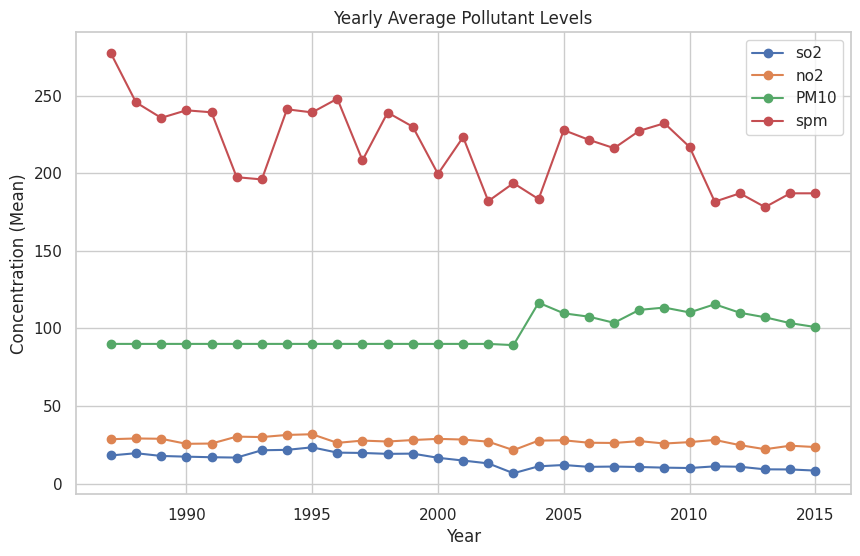

In [7]:
# Check if 'Year' exists and we have at least one pollutant
if 'Year' in df.columns and len(available_pollutants) > 0:
    yearly_data = df.groupby('Year')[available_pollutants].mean().reset_index()

    plt.figure(figsize=(10,6))
    for col in available_pollutants:
        plt.plot(yearly_data['Year'], yearly_data[col], marker='o', label=col)
    plt.title('Yearly Average Pollutant Levels')
    plt.xlabel('Year')
    plt.ylabel('Concentration (Mean)')
    plt.legend()
    plt.show()
else:
    print("Either 'Year' column doesn't exist or no pollutants found.")

<ipython-input-8-dc8c57abfe7e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='so2', y='state', data=state_avg_so2, palette='viridis')


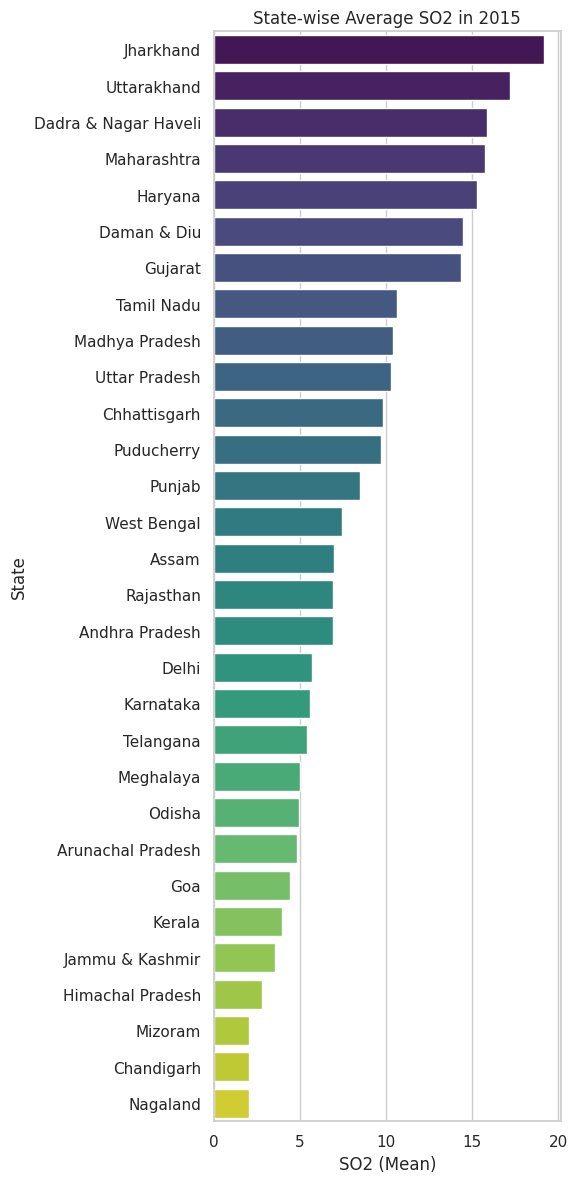


EDA & Visualization complete!


In [8]:
# Analyze pollutant levels by state for the most recent year
if 'Year' in df.columns and 'state' in df.columns:
    latest_year = df['Year'].max()
    df_latest = df[df['Year'] == latest_year].copy()

    # Example: state-wise average SO2
    if 'so2' in df_latest.columns:
        state_avg_so2 = df_latest.groupby('state')['so2'].mean().reset_index()
        state_avg_so2 = state_avg_so2.sort_values('so2', ascending=False)

        # Drop rows with missing state if needed
        state_avg_so2.dropna(subset=['state'], inplace=True)

        plt.figure(figsize=(6,12))
        sns.barplot(x='so2', y='state', data=state_avg_so2, palette='viridis')
        plt.title(f'State-wise Average SO2 in {latest_year}')
        plt.xlabel('SO2 (Mean)')
        plt.ylabel('State')
        plt.tight_layout()
        plt.show()
    else:
        print("Column 'so2' not found in the data.")
else:
    print("No 'Year' or 'state' column available for state-wise analysis.")

print("\nEDA & Visualization complete!")

In [10]:
# Count number of rows per state
state_counts = df.groupby('state').size().reset_index(name='location_count')

# Sort if you want (optional)
state_counts = state_counts.sort_values(by='location_count', ascending=False)

# Display the result
print(state_counts)


                   state  location_count
18           Maharashtra           60284
30         Uttar Pradesh           42775
0         Andhra Pradesh           26158
25                Punjab           25634
26             Rajasthan           25566
16                Kerala           24591
12      Himachal Pradesh           22883
33           West Bengal           22453
10               Gujarat           21238
28            Tamil Nadu           20585
17        Madhya Pradesh           19910
2                  Assam           19358
23                Odisha           19269
15             Karnataka           17098
8                  Delhi            8549
4             Chandigarh            8514
5           Chhattisgarh            7831
9                    Goa            6204
14             Jharkhand            5968
21               Mizoram            5336
29             Telangana            3978
20             Meghalaya            3853
24            Puducherry            3779
11              

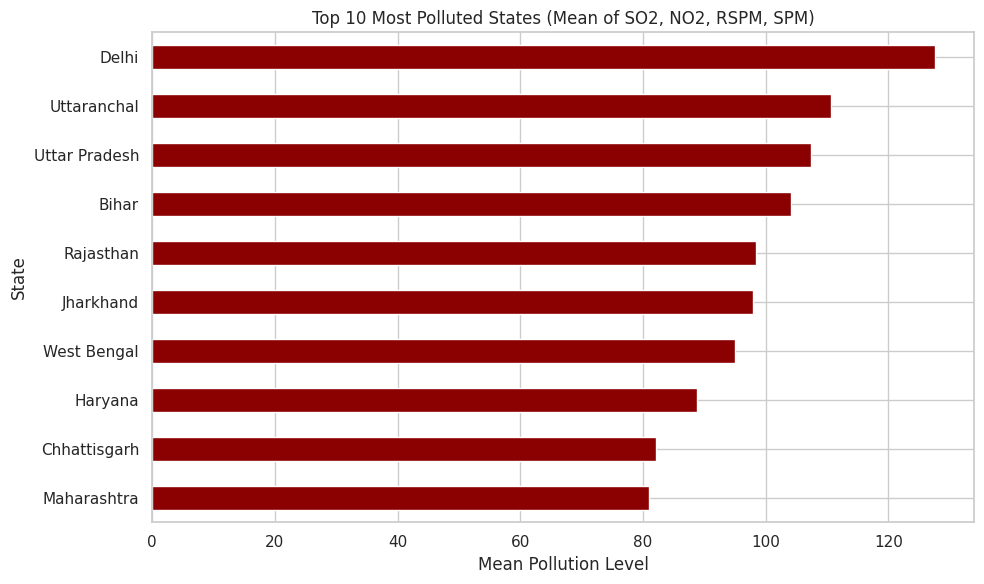

In [12]:
pollutants = ['so2', 'no2', 'spm']

# Filter out rows with missing 'state'
polluted_data = df.dropna(subset=['state'])

# Calculate mean of pollutants per state
state_pollution = polluted_data.groupby('state')[pollutants].mean()

# Calculate overall mean pollution across pollutants
state_pollution['mean_pollution'] = state_pollution.mean(axis=1)

# Top 10 most polluted states
top10_polluted_states = state_pollution.sort_values(by='mean_pollution', ascending=False).head(10)

# Plot
top10_polluted_states['mean_pollution'].plot(kind='barh', figsize=(10,6), color='darkred')
plt.title('Top 10 Most Polluted States (Mean of SO2, NO2, SPM)')
plt.xlabel('Mean Pollution Level')
plt.ylabel('State')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


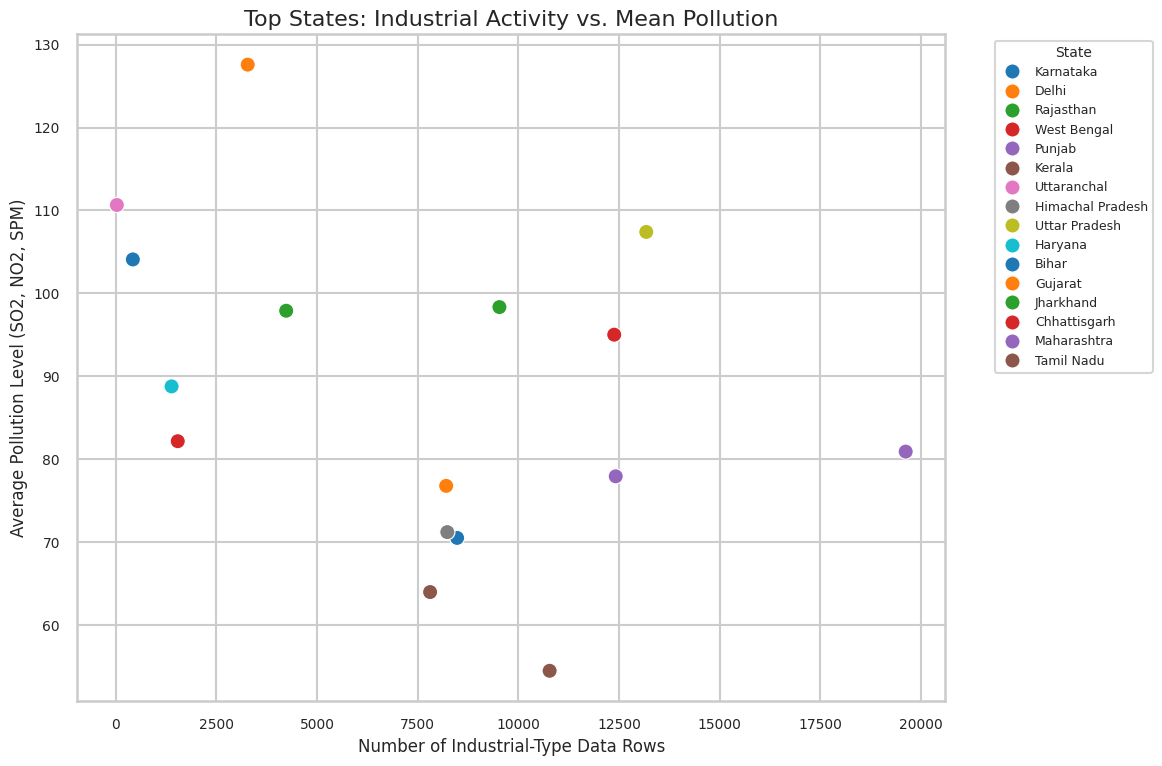

In [18]:
# Step 1: Mean pollution per state (SO2, NO2, SPM)
pollutants = ['so2', 'no2', 'spm']
polluted_data = df.dropna(subset=['state'])
state_pollution = polluted_data.groupby('state')[pollutants].mean()
state_pollution['mean_pollution'] = state_pollution.mean(axis=1)

# Step 2: Industrial-type counts per state
type_data = df.dropna(subset=['state', 'type'])
industrial_rows = type_data[type_data['type'].str.contains('industrial', case=False, na=False)]
industrial_counts = industrial_rows['state'].value_counts()
industrial_df = industrial_counts.rename('industrial_count').to_frame()

# Step 3: Merge and filter top 10s
combined_df = state_pollution.join(industrial_df, how='inner')

# Get top 10s
top10_polluted = combined_df.sort_values(by='mean_pollution', ascending=False).head(10)
top10_industrial = combined_df.sort_values(by='industrial_count', ascending=False).head(10)

# Combine top states from both (with union)
top_states = set(top10_polluted.index).union(set(top10_industrial.index))
filtered_df = combined_df.loc[list(top_states)]


# Step 4: Plot (same as earlier, but filtered)
plt.figure(figsize=(12,8))  # Increased figure size

sns.scatterplot(
    data=filtered_df.reset_index(),
    x='industrial_count',
    y='mean_pollution',
    hue='state',
    palette='tab10',
    s=120  # slightly larger markers for visibility
)

plt.title("Top States: Industrial Activity vs. Mean Pollution", fontsize=16)
plt.xlabel("Number of Industrial-Type Data Rows", fontsize=12)
plt.ylabel("Average Pollution Level (SO2, NO2, SPM)", fontsize=12)

# Smaller legend font
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='State', fontsize=9, title_fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()



In [19]:
pollutants = ['so2', 'no2', 'spm']
type_stats = df.groupby('type')[pollutants].agg(['mean', 'median']).round(2)

# Optional: Filter out types with too few data rows
type_counts = df['type'].value_counts()
valid_types = type_counts[type_counts > 100].index  # you can set your own threshold
type_stats = type_stats.loc[valid_types]

display(type_stats)


so2           no2            spm       
                                     mean median   mean median    mean median
type                                                                         
Residential, Rural and other Areas   9.18   7.00  23.40  20.00  188.76  187.0
Industrial Area                     13.00   9.00  28.99  24.00  197.45  187.0
Residential and others               9.83   8.00  25.19  22.00  211.69  187.0
Industrial Areas                    12.99   9.50  29.51  25.30  242.97  199.0
Sensitive Area                       5.31   4.00  18.18  16.00  180.39  187.0
Sensitive Areas                      7.61   8.00  22.79  21.80  251.54  178.0
RIRUO                               10.91  13.00  31.78  24.00  187.00  187.0
Sensitive                           10.27   8.00  24.40  14.85  222.08  187.0
Industrial                          23.03  15.70  35.14  22.00  299.47  230.0
Residential                         12.94   8.35  20.22  22.00  271.39  231.0

In [24]:
pollutants = ['so2', 'no2', 'spm']
type_stats = df.groupby('type')[pollutants].agg(['mean', 'median']).round(2)

# Optional: filter out types with very few records (e.g., less than 100)
type_counts = df['type'].value_counts()
valid_types = type_counts[type_counts > 100].index
type_stats = type_stats.loc[valid_types]


<Figure size 1200x600 with 0 Axes>

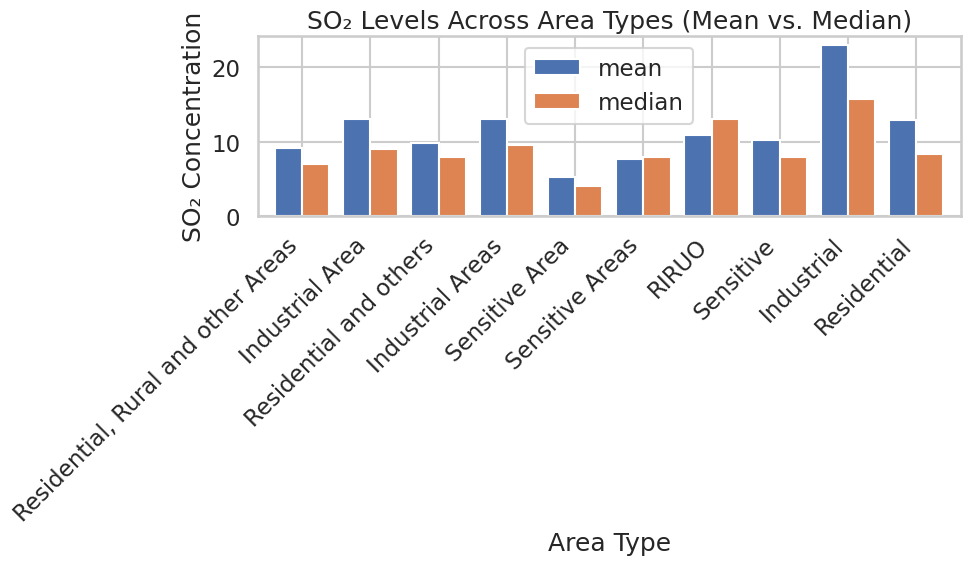

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
type_stats['so2'][['mean', 'median']].plot(kind='bar', width=0.8)
plt.title("SO₂ Levels Across Area Types (Mean vs. Median)")
plt.ylabel("SO₂ Concentration")
plt.xlabel("Area Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-26-664287fcf483>:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Statistic')


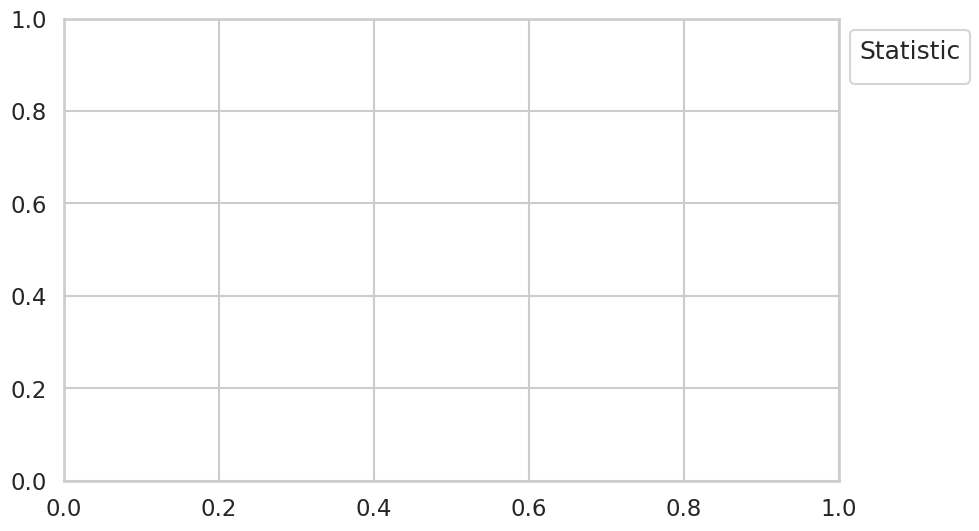

In [26]:
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Statistic')


<Figure size 1200x600 with 0 Axes>

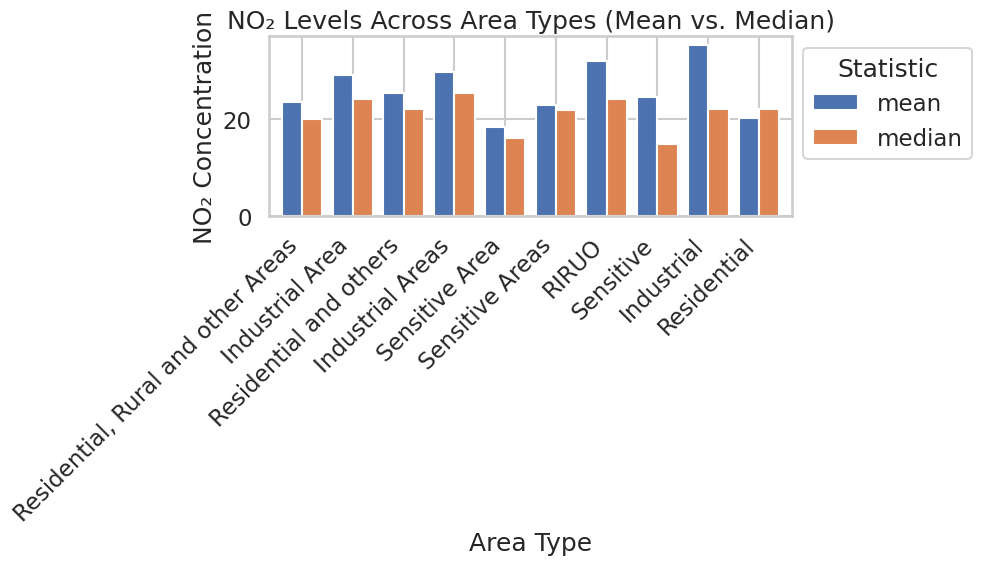

In [27]:
plt.figure(figsize=(12,6))
type_stats['no2'][['mean', 'median']].plot(kind='bar', width=0.8)
plt.title("NO₂ Levels Across Area Types (Mean vs. Median)")
plt.ylabel("NO₂ Concentration")
plt.xlabel("Area Type")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Statistic')  # Move legend
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

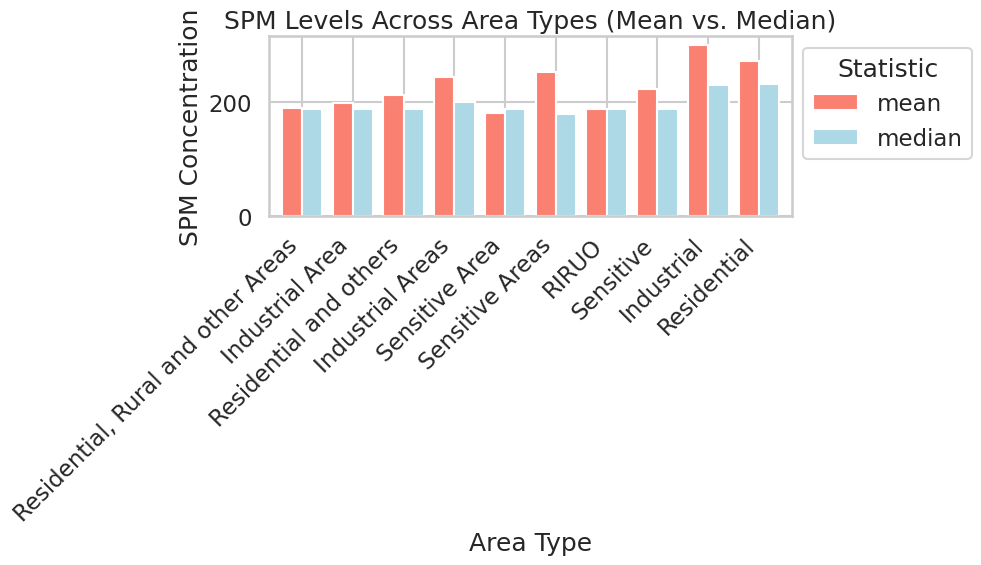

In [28]:
plt.figure(figsize=(12,6))
type_stats['spm'][['mean', 'median']].plot(kind='bar', width=0.8, color=['salmon', 'lightblue'])
plt.title("SPM Levels Across Area Types (Mean vs. Median)")
plt.ylabel("SPM Concentration")
plt.xlabel("Area Type")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Statistic')  # Move legend
plt.tight_layout()
plt.show()
